In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import *
import math as mt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/atarockz/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['bar', 'e', 'pi', 'find']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
print pi, G

3.14159265359 6.67408e-11


In [3]:
# c= r_200/a donde 6<c<16 para el valor medio con forme el halo aunmenta de 3x10^11M_sol a 3x10^15M_sol
# r_200 es 200*rho_c donde rho_c = 3*H^2(t)/8piG
#parámetros
rho_0 = 1.
a = 1.
C = 4.*pi*G*rho_0*a**2.
print C

8.38689627899e-10


In [4]:
def Vc_Jaffe(r):
    f = 1./(1. + r/a)
    Vc = np.sqrt(C*f)
    return Vc

In [5]:
def Vc_Hernquist(r):
    f = (a*r)/(2.*(1. + r/a)**2.)
    Vc = np.sqrt(C*f)
    return Vc

In [6]:
def Vc_NFW(r):
    f = 1./r*np.log(1. + r/a) - 1./(1. + r/a)
    Vc = np.sqrt(C*f)
    return Vc

In [7]:
r = np.linspace(0.,100.,1000)

In [8]:
y = Vc_Jaffe(r)/np.sqrt(C)
x = r/a

In [9]:
#plt.plot(x,y,'.')
#plt.show()

In [10]:
y_1 = Vc_Hernquist(r)/np.sqrt(C)
#plt.plot(x,y_1,'.')
#plt.show()

In [11]:
y_2 = Vc_NFW(r)/np.sqrt(C)
#plt.plot(x,y_2,'.')
#plt.show()

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


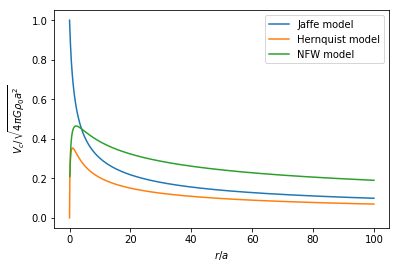

In [12]:
plt.plot(x,y,label='Jaffe model')
plt.plot(x,y_1, label='Hernquist model')
plt.plot(x,y_2, label='NFW model')
plt.xlabel(r'$r/a$')
plt.ylabel(r'$V_{c}/\sqrt{4\pi G\rho_{0}a^{2}}$')
plt.legend(loc='upper right', prop={'size':10})
#plt.xlim(0.,10.)
plt.show()

Perfil de densidad $\rho_{DM}(r) = \rho_{0} \frac{r}{r_{DM}}^{-\gamma_{DM}} (1 + (\frac{r}{r_{DM}})^{\alpha_{DM}})^{(\gamma_{DM} - \beta_{DM})/\alpha_{DM}}$

donde $M(r) = 4\pi \int_{0}^{r} \rho(r') r'^{2} dr'$

entonces $M(r) = 4\pi \int_{0}^{r} \rho_{0} \frac{r'}{r_{DM}}^{-\gamma_{DM}} (1 + (\frac{r'}{r_{DM}})^{\alpha_{DM}})^{(\gamma_{DM} - \beta_{DM})/\alpha_{DM}} r'^{2} dr'$

$M(r) = 4\pi \rho_{0} \frac{r^{3}(\frac{r}{r_{DM}})^{\gamma} 2F_{1}(\frac{\beta - \gamma}{\alpha};\frac{\gamma + 3}{\alpha};\frac{\alpha + \gamma + 3}{\alpha};-\frac{r}{r_{DM}}^{\alpha})}{\gamma + 3}\mid_{0}^{r}$

donde $2F_{1} = \sum_{n=0}^{\infty} \frac{(\frac{\beta - \gamma}{\alpha})_{n} (\frac{\gamma + 3}{\alpha})_{n}}{(\frac{\alpha + \gamma + 3}{\alpha})_{n}}\frac{(-(\frac{r}{r_{DM}})^{\alpha})^{n}}{n!}$

In [13]:
alpha = 1.
beta = 3.
gamma = 0.
gamma_1 = 1.
r_DM = 1.#r_DM/kpc
rho_0 = 0.064

In [14]:
r = np.linspace(0.,100.,1000)

In [15]:
a = (beta-gamma)/alpha
b = (gamma +3.)/alpha
c = (alpha + gamma + 3.)/alpha

In [16]:
#n=0
M_0 = (4.*pi*rho_0*(r**3)*((r/r_DM)**gamma)*(a*b)/c)/(gamma + 3.)

In [17]:
n = 3
for i in range(n):
    f = (-(r/r_DM)**alpha)**i/mt.factorial(i)
    f += f
M = M_0*f
logM = np.log(M)

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


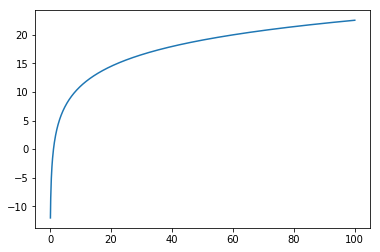

In [18]:
plt.plot(r,logM)
plt.show()

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


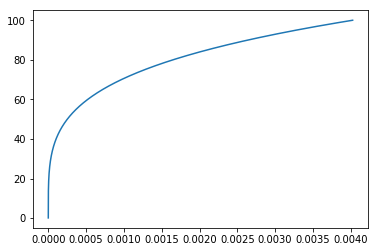

In [19]:
V_c = G*M/r
plt.plot(V_c, r)
plt.show()

In [ ]:
def funcion(r,rho,r_dm,alpha=1,bea1